### Student Information
Name: 許暐彤 Hsu, Wei-tung

Student ID: 110061542

GitHub ID: Victoria-Wei

Kaggle name: Wei-tungHsu

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

In [4]:
### Begin Assignment Here

## First: take home exercises

In [5]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("data/train_df.pkl")
test_df = pd.read_pickle("data/test_df.pkl")

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


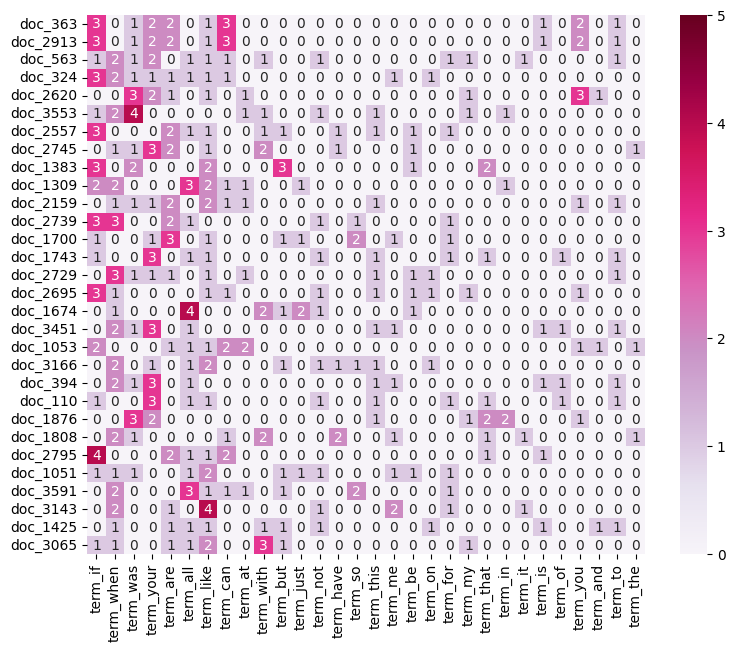

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for training set
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(train_df.text)

ocur_times_word = np.sum(X_counts[:, :].toarray(), axis=0)                   # occuring times of words
sort_idx_word = np.argsort(ocur_times_word)                                  # sort by values, and store the indexes

ocur_times_file = np.sum(X_counts[:, sort_idx_word[-30:]].toarray(), axis=1) # occuring times of 30 most frequently used words for each file
sort_idx_file = np.argsort(ocur_times_file)                                  # sort by values, and store the indexes

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[sort_idx_word[-30:]]]
plot_y = ["doc_"+ str(i) for i in np.array(train_df.index)[sort_idx_file[-30:]]]
plot_z = np.zeros((30, 30))
for i in range(30):         # (y, x)
    for j in range(30):
        plot_z[i, j] = X_counts[sort_idx_file[-(i+1)], sort_idx_word[-(j+1)]]
    
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=5, annot=True)

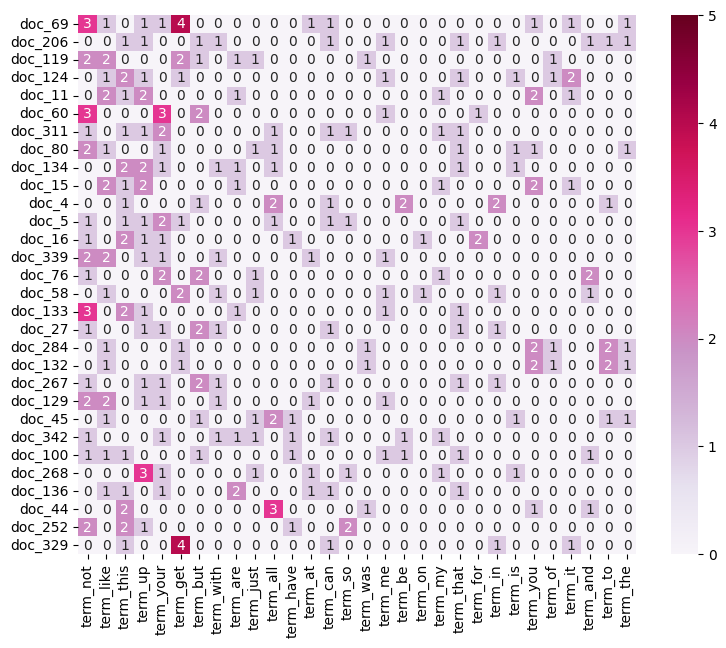

In [7]:
# for testing set
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(test_df.text)

ocur_times_word = np.sum(X_counts[:, :].toarray(), axis=0)                   # occuring times of words
sort_idx_word = np.argsort(ocur_times_word)                                  # sort by values, and store the indexes

ocur_times_file = np.sum(X_counts[:, sort_idx_word[-30:]].toarray(), axis=1) # occuring times of 30 most frequently used words for each file
sort_idx_file = np.argsort(ocur_times_file)                                  # sort by values, and store the indexes

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[sort_idx_word[-30:]]]
plot_y = ["doc_"+ str(i) for i in np.array(test_df.index)[sort_idx_file[-30:]]]
plot_z = np.zeros((30, 30))
for i in range(30):         # (y, x)
    for j in range(30):
        plot_z[i, j] = X_counts[sort_idx_file[-(i+1)], sort_idx_word[-(j+1)]]
    
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=5, annot=True)

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectoriser = TfidfVectorizer(max_features=1000)
tf_idf_scores = vectoriser.fit_transform(train_df["text"])
feature_names_1000 = vectoriser.get_feature_names_out()
feature_names_1000[100:110]

array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results below? What do they mean?

In [9]:
import nltk
from sklearn.tree import DecisionTreeClassifier

# build analyzers (bag-of-words)
# use different tokenizer, choose most-shown words
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

/home/user/anaconda3/envs/data_mining/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [10]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.66


In [11]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd' # int, 'f' for float
    thresh = cm.max() / 2. # threshold for color band(?
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

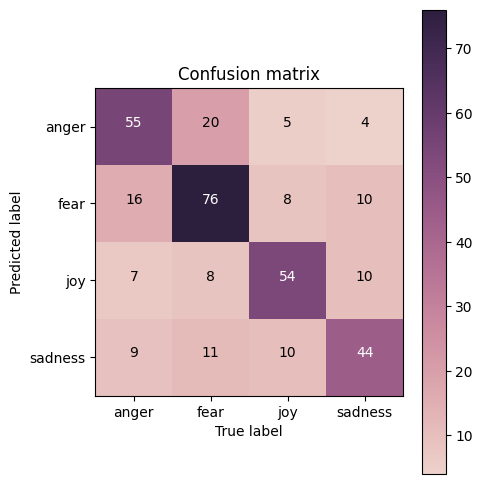

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 

# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

We first see that the model performs well on training set, while failing to perform the same in testing set. Overfitting might happened. This can be avoided by setting a smaller max depth for decision tree. Moreover, in confusion matrix, we can see that fear and anger are the most confusing for this model. It misclassifies anger as fear and fear as anger most often among all the other misclassifications.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

training accuracy: 0.79
testing accuracy: 0.7


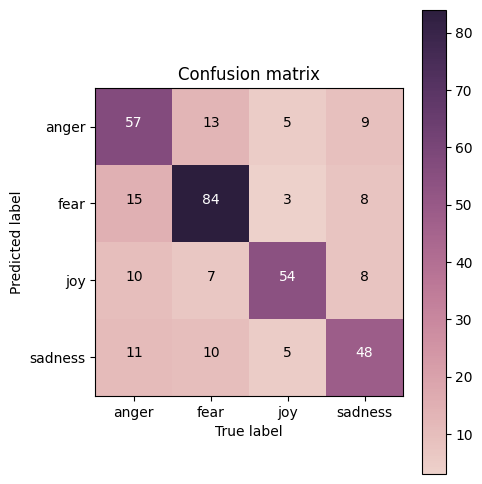

In [13]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train, y_train)                                 # train model

y_train_pred = bnb.predict(X_train)                       # predict training set
y_test_pred = bnb.predict(X_test)                         # predict testing set

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.61      0.68      0.64        84
        fear       0.74      0.76      0.75       110
         joy       0.81      0.68      0.74        79
     sadness       0.66      0.65      0.65        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.70       347
weighted avg       0.71      0.70      0.70       347



---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

Decision Tree model results in better accuracy in training set than Naive Bayes model. However, latter is more generalized to the dataset, as it performs similarly well on unseen testing set.

We learnt that Decision Trees has the disadvantage of suffering from overfitting, especially when the tree is large. Overfitting happened in this case, resulting in high performance for training set and poor one for testing set.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

In [15]:
import keras
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train) # to one-hot
y_test = label_encode(label_encoder, y_test)

# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

2022-11-04 14:55:42.731509: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-04 14:55:43.012341: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-04 14:55:43.074322: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-04 14:55:43.074344: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

input_shape:  500
output_shape:  4
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)        

2022-11-04 14:55:47.159848: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-04 14:55:47.160160: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-04 14:55:47.160330: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-11-04 14:55:47.160468: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-11-04 14:55:47.160538: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [16]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv') # save training results

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


/home/user/anaconda3/envs/data_mining/lib/python3.9/site-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


113/113 [==============================] - 1s 3ms/step - loss: 1.3366 - accuracy: 0.3609 - val_loss: 1.2853 - val_accuracy: 0.4496
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 0.9948 - accuracy: 0.6468 - val_loss: 0.9137 - val_accuracy: 0.6715
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.7930 - val_loss: 0.7912 - val_accuracy: 0.7205
Epoch 4/25
113/113 [==============================] - 0s 1ms/step - loss: 0.4215 - accuracy: 0.8467 - val_loss: 0.7495 - val_accuracy: 0.7061
Epoch 5/25
113/113 [==============================] - 0s 1ms/step - loss: 0.3317 - accuracy: 0.8766 - val_loss: 0.8126 - val_accuracy: 0.7233
Epoch 6/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2690 - accuracy: 0.9073 - val_loss: 0.8233 - val_accuracy: 0.7406
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2272 - accuracy: 0.9294 - val_loss: 0.8722 - val_accuracy: 0.7118
Epoch 8/25
113/11

In [17]:
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.360919,1.336597,0.449568,1.285274
1,1,0.646831,0.994847,0.671470,0.913744
2,2,0.792970,0.588670,0.720461,0.791176
3,3,0.846665,0.421546,0.706052,0.749464
4,4,0.876557,0.331717,0.723343,0.812550
5,5,0.907279,0.268963,0.740634,0.823254
6,6,0.929422,0.227235,0.711816,0.872246
7,7,0.937448,0.195396,0.708934,0.917278
8,8,0.948242,0.168163,0.703170,0.938213
9,9,0.957099,0.143240,0.723343,1.017730


Text(0.5, 1.0, 'Loss')

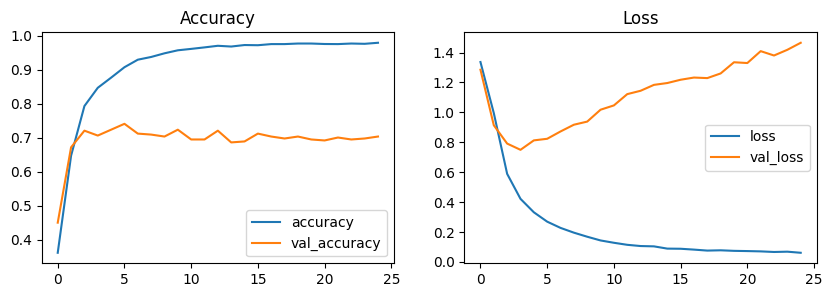

In [18]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 3))

training_log["accuracy"].plot(ax=axes[0])
training_log["val_accuracy"].plot(ax=axes[0])
training_log["loss"].plot(ax=axes[1])
training_log["val_loss"].plot(ax=axes[1])
axes[0].legend()
axes[1].legend()
axes[0].set_title("Accuracy")
axes[1].set_title("Loss")

We see that validation accuracy stops improving at around epoch = 3. At the same time, loss for validation set starts to grow. This is the indication showing that our model overfitted at epoch = 3.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

We can average these word vectors to generate "sentence" vector for each file.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [19]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "./GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True, limit=1000000) # add limit to avoid kernel dying
print('load ok')

load ok


In [20]:
from sklearn.manifold import TSNE

word_list = ["angry", "happy", "sad", "fear"]
topn = 15
target_words = []
for wd in word_list:
    target_words += [wd] + [word_ for word_, sim_ in w2v_google_model.most_similar(wd, topn=topn)]
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

/home/user/anaconda3/envs/data_mining/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/user/anaconda3/envs/data_mining/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


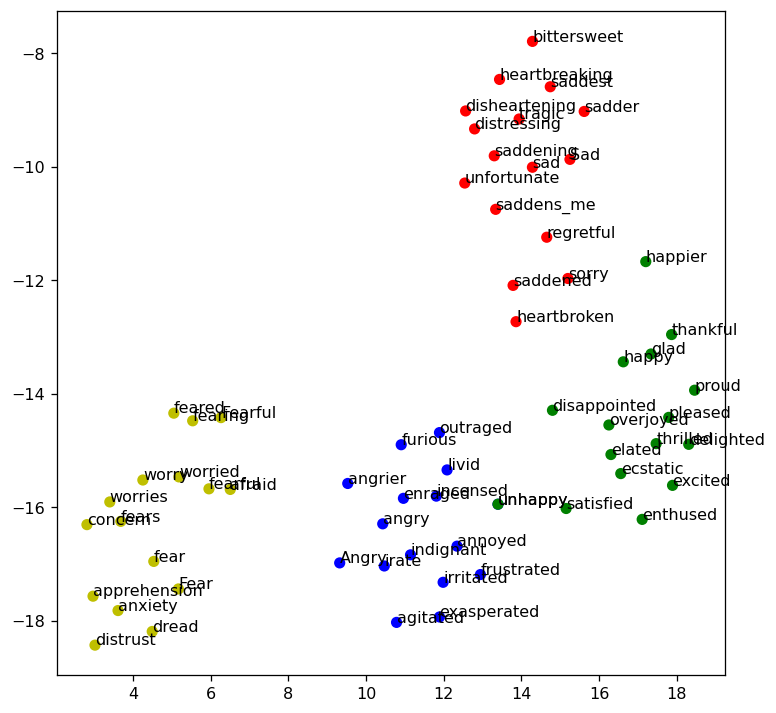

In [21]:
## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 

4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.